In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [20]:
df=pd.read_csv('loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_to_Income_Ratio
0,1,0,0,0,0,169.968275,0,1,2,1,8.092563,0.016862
1,1,1,1,0,0,169.968275,0,1,0,0,8.129112,0.016351
2,1,1,0,0,1,110.357703,0,1,2,1,7.489669,0.016929
3,1,1,0,1,0,163.303012,0,1,2,1,7.940400,0.018219
4,1,0,0,0,0,180.330340,0,1,2,1,8.115542,0.017784


In [21]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [22]:
print(df['LoanAmount'].skew(),
df['Total_Income'].skew(),
df['Debt_to_Income_Ratio'].skew())

0.028750279762134925 -0.004765653628285025 -0.1324394210036252


In [23]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
# Balancing the training data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [25]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['LoanAmount', 'Total_Income', 'Debt_to_Income_Ratio']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [26]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[21 22]
 [ 4 76]]
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



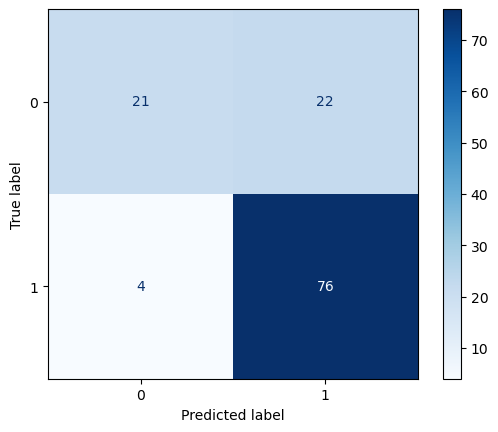

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")

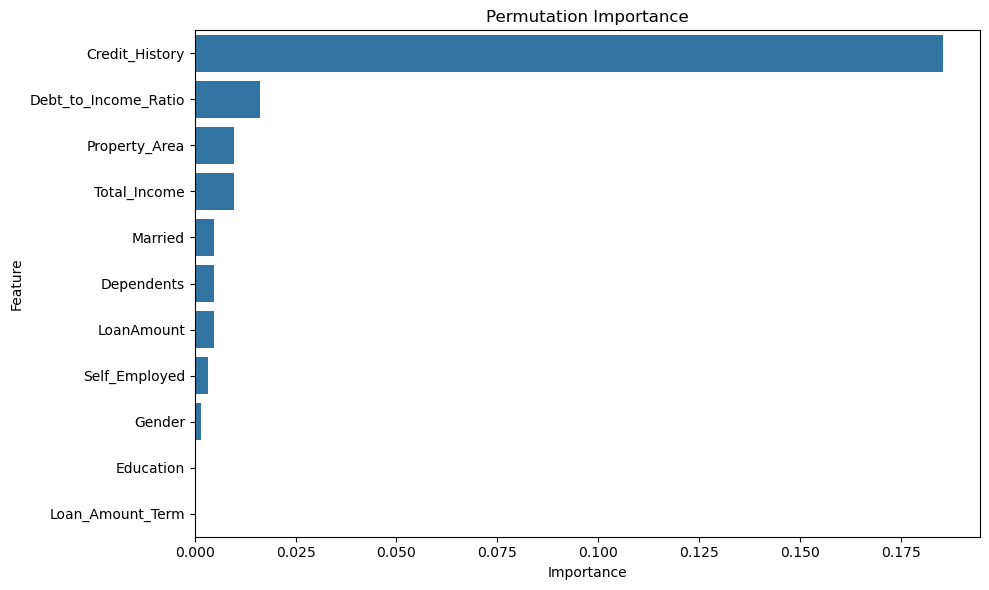

In [30]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', random_state=42)

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()


# Hyper parameter tunning 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'class_weight': [None, 'balanced']
}

# Initialize the SVC
svc = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit to the data
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=No

Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



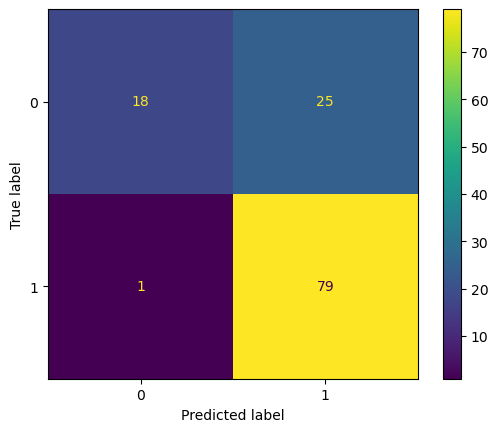

In [31]:

df=pd.read_csv('loan_train.csv')
df.head()

X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Balancing the training data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['LoanAmount', 'Total_Income', 'Debt_to_Income_Ratio']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Model training
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
